# Project No.1 : Data Analysis on US-Census

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Loading All The CSV Files Data & Make a single DataFrame

In [2]:
import glob

# Get data file names
path = r'C:\Users\OC\Documents\python tasks'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
us_census = pd.concat(dfs, ignore_index=True)

In [3]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [4]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [5]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

# Now We Clean the Data By removing unnecessary things from our dataframe

In [6]:
#Dropping Unwanted columns
us_census=us_census.drop('Unnamed: 0',axis=1)

us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [7]:
#Dropping Duplicate rows

us_census = us_census.drop_duplicates(subset=['State'])
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
28    False
29    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
43    False
44    False
45    False
46    False
47    False
49    False
50    False
51    False
52    False
53    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [8]:
# Editing RACE's columns and changing dtypes

us_census['Hispanic'] = us_census['Hispanic'].str.replace('%','').astype(float)
us_census['White'] = us_census['White'].str.replace('%','').astype(float)
us_census['Black'] = us_census['Black'].str.replace('%','').astype(float)
us_census['Native'] = us_census['Native'].str.replace('%','').astype(float)
us_census['Asian'] = us_census['Asian'].str.replace('%','').astype(float)
us_census['Pacific'] = us_census['Pacific'].str.replace('%','').astype(float)
us_census['Income'] = us_census['Income'].str.replace('$','').astype(float)

C:\Users\OC\AppData\Local\Temp\ipykernel_10408\2917698819.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census['Income'] = us_census['Income'].str.replace('$','').astype(float)


In [9]:
# Rounding floats to 2 decimal places

us_census = us_census.round(decimals=2)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F


In [10]:
# Chexking dtypes of columns

us_census.dtypes

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
dtype: object

In [11]:
#Splitting GenderPop Column into Male_Pop and Female_Pop

us_census[['Male_Pop','Female_Pop']] = us_census.GenderPop.str.split('_', expand=True)
# Dropping GenderPop column
us_census = us_census.drop('GenderPop',axis=1)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male_Pop,Female_Pop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M,2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M,349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M,3342840F
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M,1506295F
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M,19334329F


In [12]:
#Making Male_Pop and Female_Pop column suitable for future use i.e Changing dtypes of Male_Pop & Female_Pop

us_census['Male_Pop'] = us_census['Male_Pop'].str.replace('M','.0')
us_census['Female_Pop'] = us_census['Female_Pop'].str.replace('F','.0')
us_census['Male_Pop'] = us_census['Male_Pop'].astype(float)
us_census['Female_Pop'] = us_census['Female_Pop'].astype(float)
us_census.dtypes

State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Male_Pop      float64
Female_Pop    float64
dtype: object

In [13]:
us_census['Male_Pop'] = us_census['Male_Pop'].astype(int)
us_census['Female_Pop'] = us_census['Female_Pop'].astype(int)
us_census.dtypes

State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Male_Pop        int32
Female_Pop      int32
dtype: object

In [14]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male_Pop,Female_Pop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810
10,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763


In [15]:
#Filling NaN values in DataFrame

us_census = us_census.fillna('0.0')

# Filling Female_Pop column where value is Zero

us_census['Female_Pop'] = us_census['TotalPop'] - us_census['Male_Pop']
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male_Pop,Female_Pop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,0.0,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,0.0,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810
10,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763


In [16]:
#Checking types of columns before Visualization
us_census.dtypes

State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific        object
Income        float64
Male_Pop        int32
Female_Pop      int64
dtype: object

In [17]:
# Converting Pacific Column to float type as it converted back to object_type while filling null values
us_census['Pacific'] = us_census['Pacific'].astype(float)
us_census.dtypes

State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Male_Pop        int32
Female_Pop      int64
dtype: object

In [18]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male_Pop,Female_Pop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


# Now we can visualize our data  

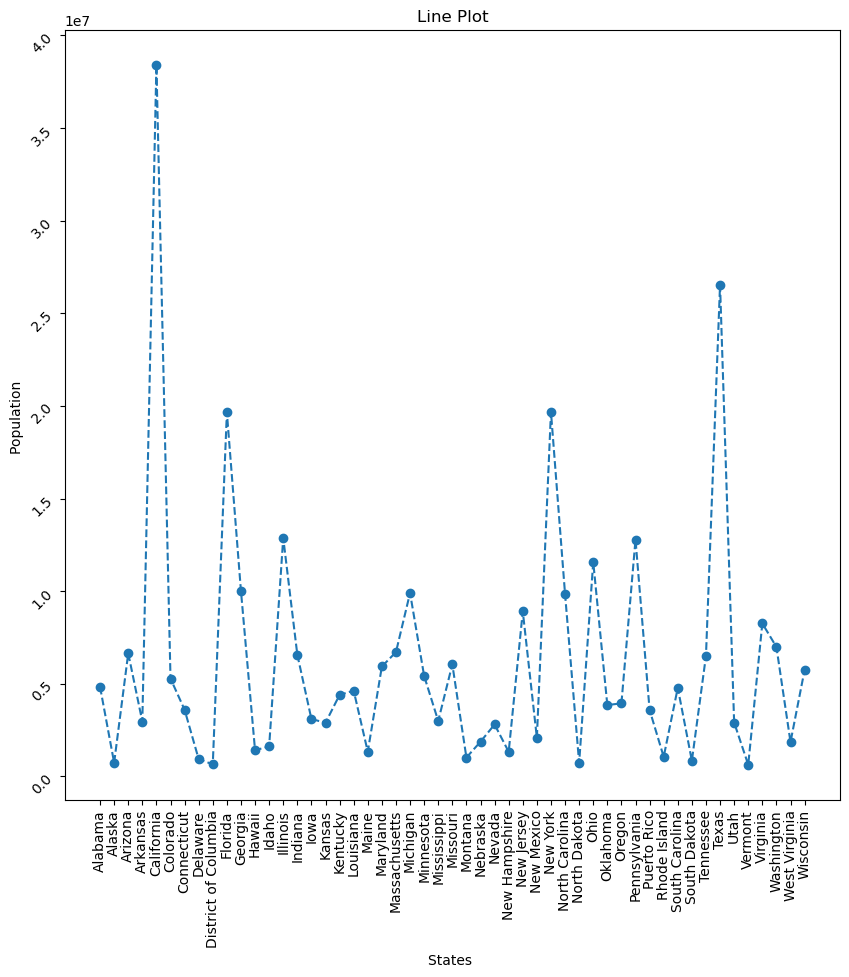

In [19]:
#Line Plot to show Population VS States 

fig, ax = plt.subplots()
ax.plot(us_census['State'],us_census['TotalPop'],marker="o", linestyle="--")

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States ')
ax.set_ylabel('Population ')

fig.set_figheight(10)
fig.set_figwidth(10)

plt.title('Line Plot')
plt.show()

# .   .   .   .  . .  .    Scatter plot 👇📈

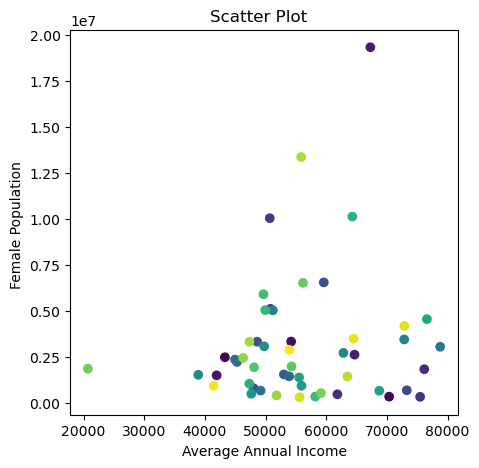

In [20]:
fig, ax = plt.subplots()
ax.scatter(x = us_census['Income'],y = us_census['Female_Pop'], c=us_census.index)

ax.set_xlabel('Average Annual Income')
ax.set_ylabel('Female Population ')

fig.set_figheight(5)
fig.set_figwidth(5)

plt.title('Scatter Plot  ')
plt.show()


# .........................Scatter Plot 

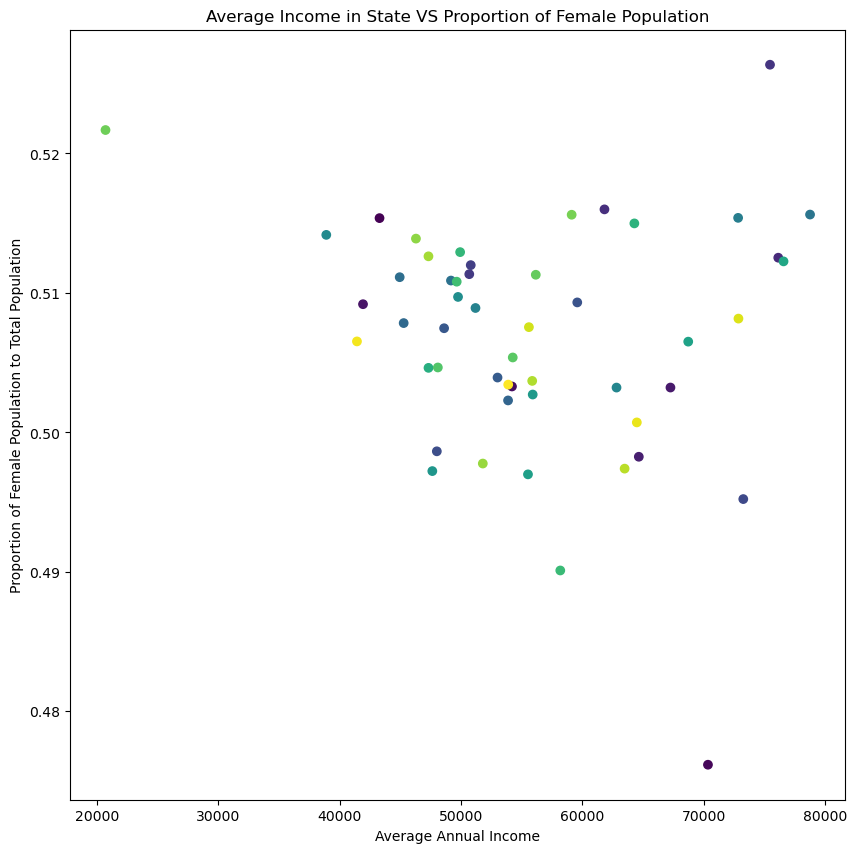

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = us_census['Income'],y = us_census['Female_Pop']/us_census['TotalPop'], c=us_census.index)

ax.set_xlabel('Average Annual Income')
ax.set_ylabel('Proportion of Female Population to Total Population')

fig.set_figheight(10)
fig.set_figwidth(10)

plt.title('Average Income in State VS Proportion of Female Population')
plt.show()

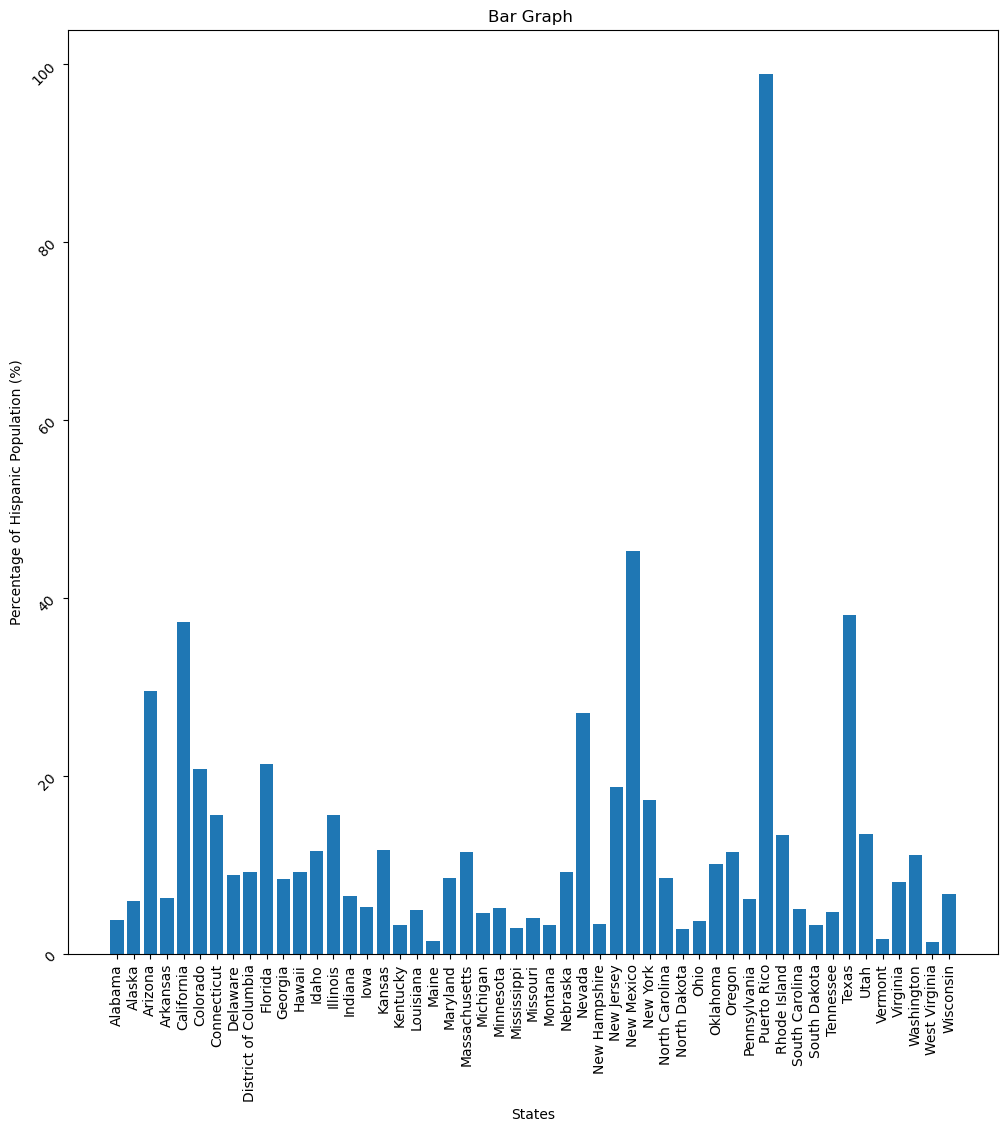

In [22]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Hispanic'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Hispanic Population (%)")

plt.title('Bar Graph ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

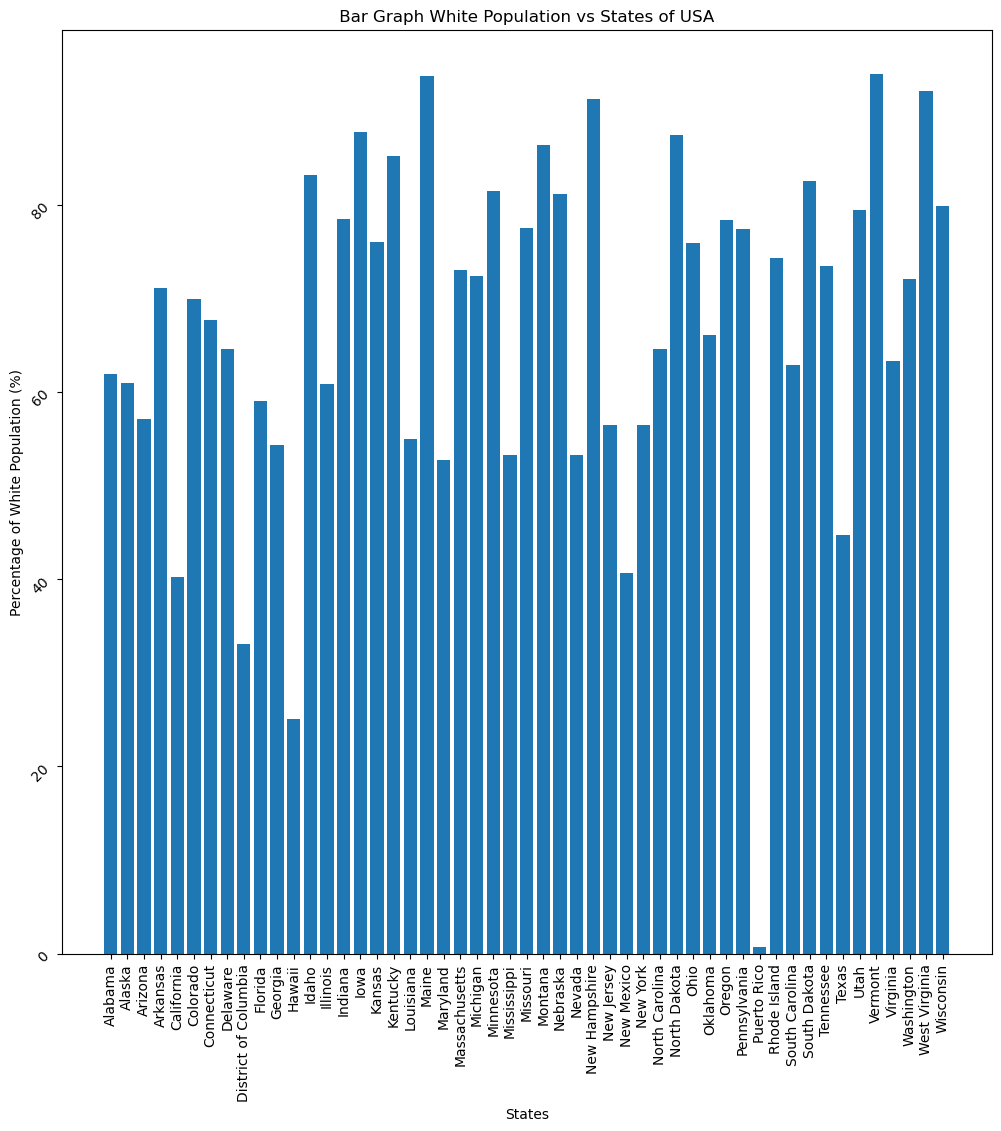

In [23]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['White'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of White Population (%)")

plt.title(' Bar Graph White Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

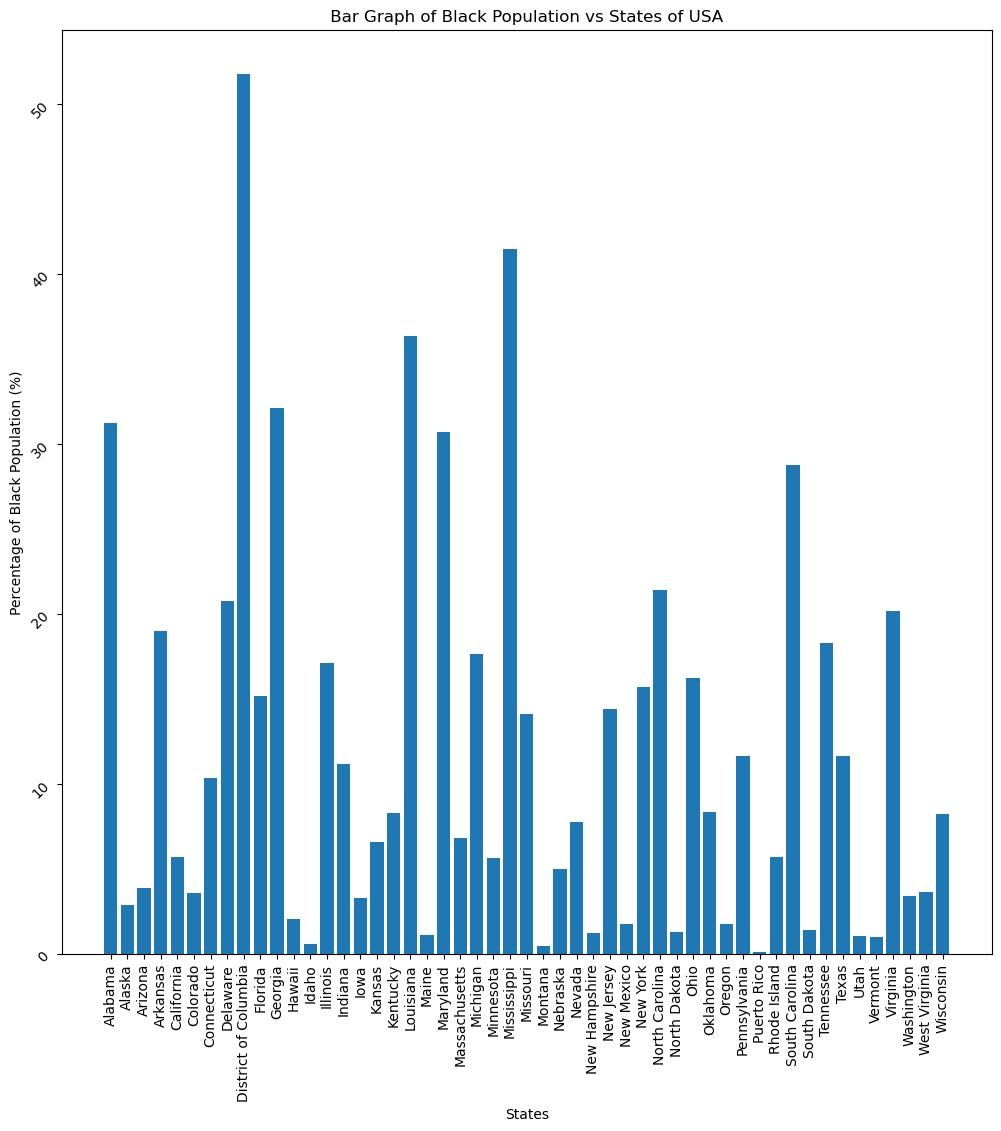

In [24]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Black'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Black Population (%)")

plt.title(' Bar Graph of Black Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

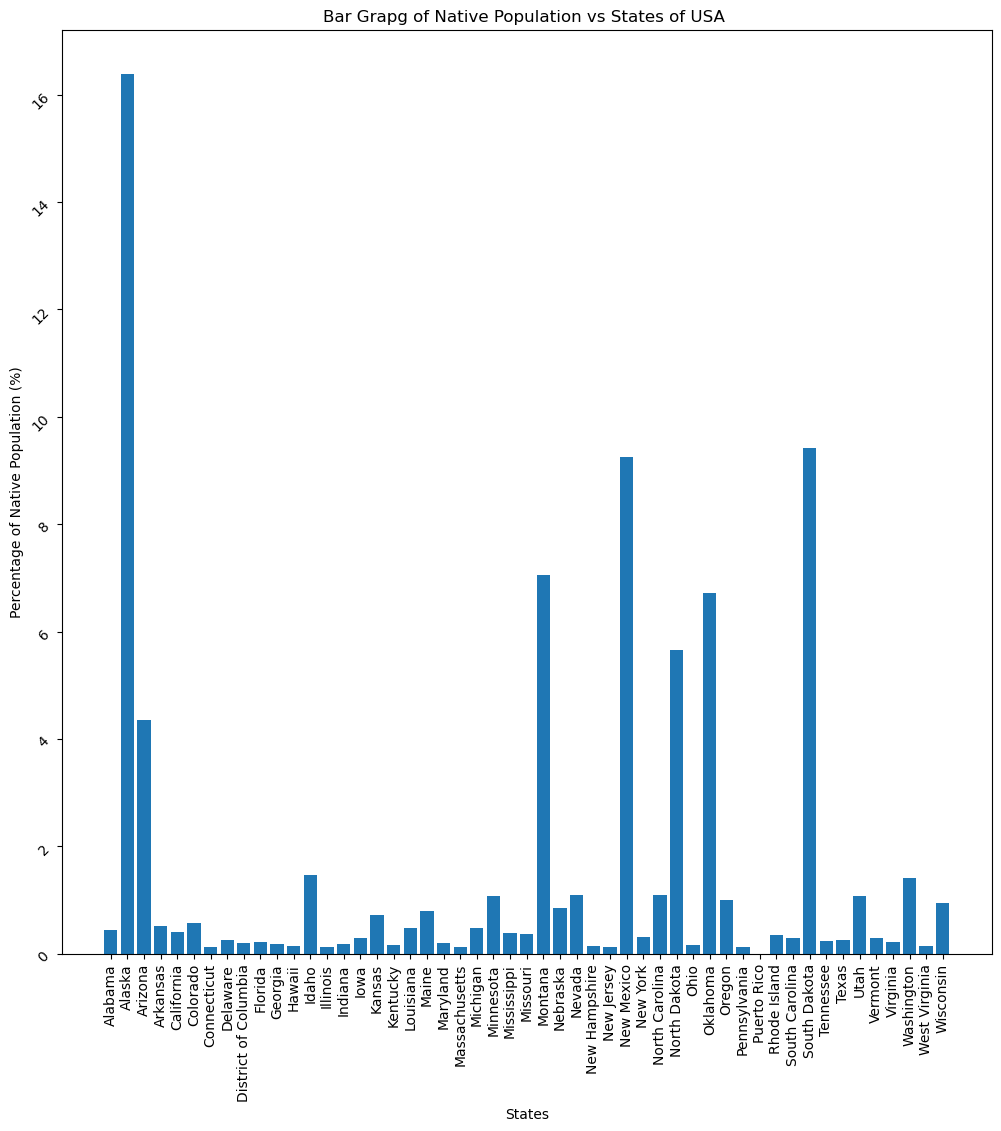

In [25]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Native'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Native Population (%)")

plt.title('Bar Grapg of Native Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

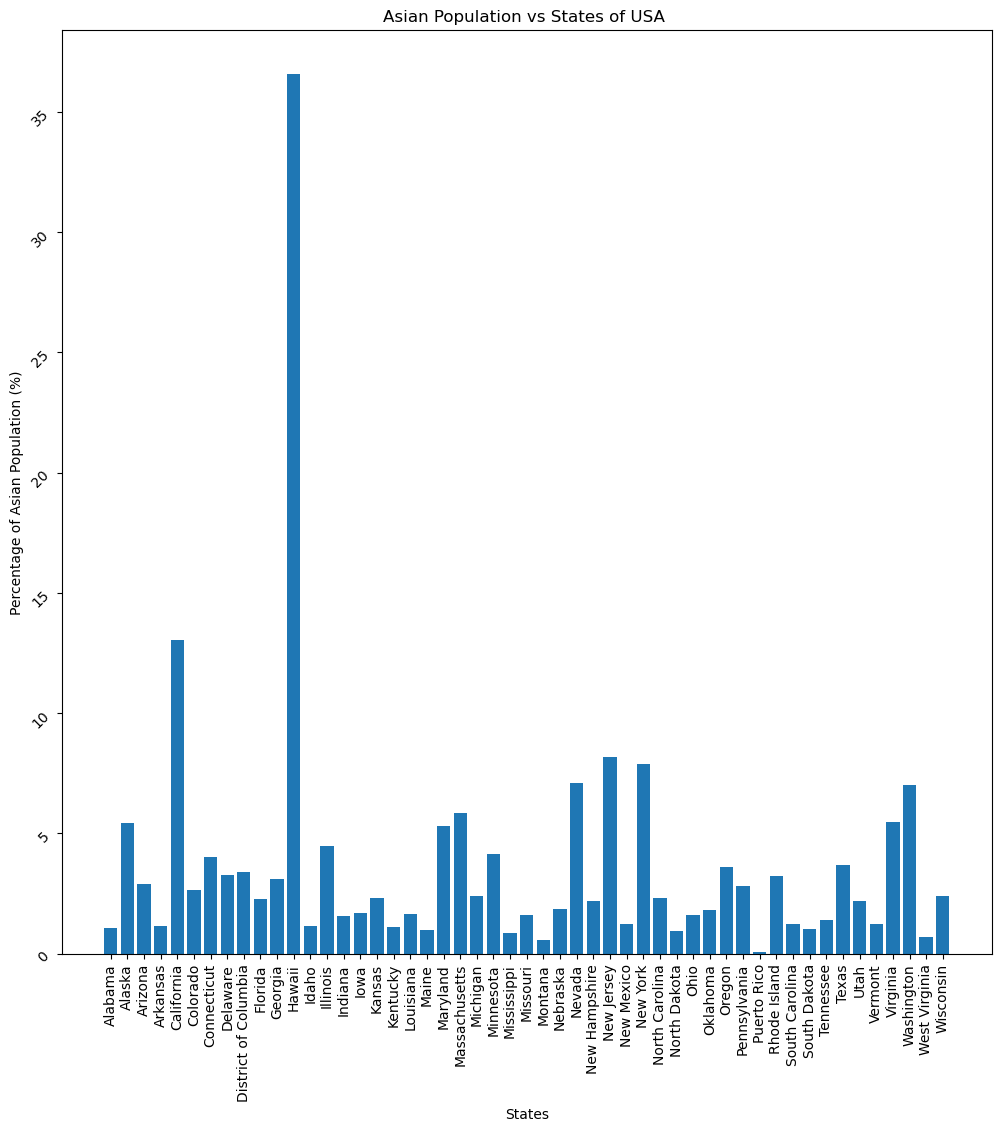

In [26]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Asian'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Asian Population (%)")

plt.title('Asian Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

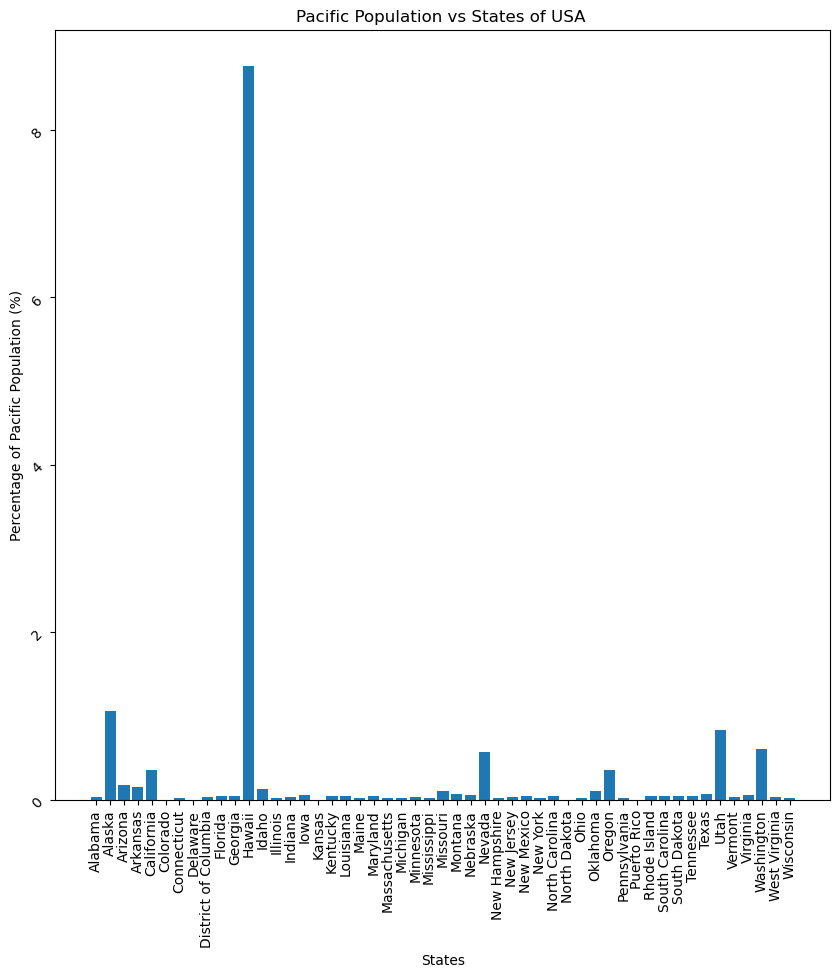

In [27]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Pacific'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Pacific Population (%)")

plt.title('Pacific Population vs States of USA ')

fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

# 2nd Method 

In [28]:
import pandas as pd

df = pd.concat(
    map(pd.read_csv, ['states0.csv', 'states1.csv', 'states2.csv', 'states3.csv', 'states4.csv', 'states5.csv', 'states6.csv', 'states7.csv','states8.csv','states9.csv'])
)

In [29]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [30]:
#Dropping Uncessary Column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      60 non-null     object
 1   TotalPop   60 non-null     int64 
 2   Hispanic   60 non-null     object
 3   White      60 non-null     object
 4   Black      60 non-null     object
 5   Native     60 non-null     object
 6   Asian      60 non-null     object
 7   Pacific    55 non-null     object
 8   Income     60 non-null     object
 9   GenderPop  60 non-null     object
dtypes: int64(1), object(9)
memory usage: 5.2+ KB


In [31]:
chars_to_remove = ['%','$']
# List of column names to clean
cols_to_clean = ['Hispanic','White','Black','Native','Asian','Pacific','Income']
# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        df[col] = df[col].apply(lambda x: str(x).replace(char, ''))
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.78230266465,19087135M_19334329F


In [32]:
cols_to_change_type = ['Hispanic','White','Black','Native','Asian','Pacific','Income']
#changing the type of columns
for col in cols_to_change_type:
    df[col] = df[col].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      60 non-null     object 
 1   TotalPop   60 non-null     int64  
 2   Hispanic   60 non-null     float64
 3   White      60 non-null     float64
 4   Black      60 non-null     float64
 5   Native     60 non-null     float64
 6   Asian      60 non-null     float64
 7   Pacific    55 non-null     float64
 8   Income     60 non-null     float64
 9   GenderPop  60 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.2+ KB


In [33]:
# Split the GenderPop column into Men and Women columns
df[['Men', 'Women']] = df['GenderPop'].str.split('_', expand=True)

# Convert Men and Women columns to numerical datatypes
df['Men'] = pd.to_numeric(df['Men'].str.replace('M', ''))
df['Women'] = pd.to_numeric(df['Women'].str.replace('F', ''))

# Drop the original GenderPop column
df.drop(columns=['GenderPop'], inplace=True)
#checking nan values
df['Women'].isna().sum()

3

In [34]:
# Fill missing values in Women column with an estimate based on TotalPop and Men
df['Women'].fillna(df['TotalPop'] - df['Men'], inplace=True)
#checking nan values again
df['Women'].isna().sum()

0

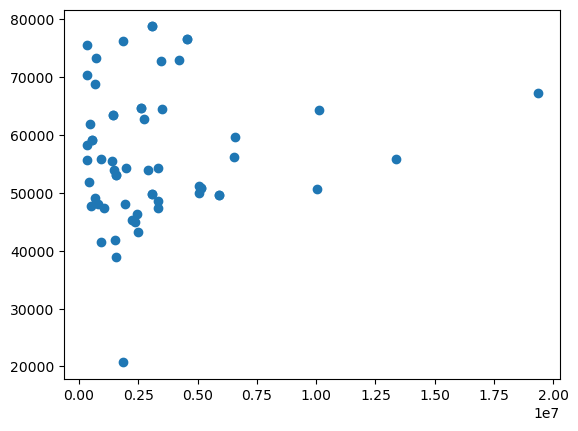

In [35]:
plt.scatter(x=df['Women'],y=df['Income'])

In [36]:
#checking for duplicate values
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [37]:
df = df.drop_duplicates()
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135,19334329.0


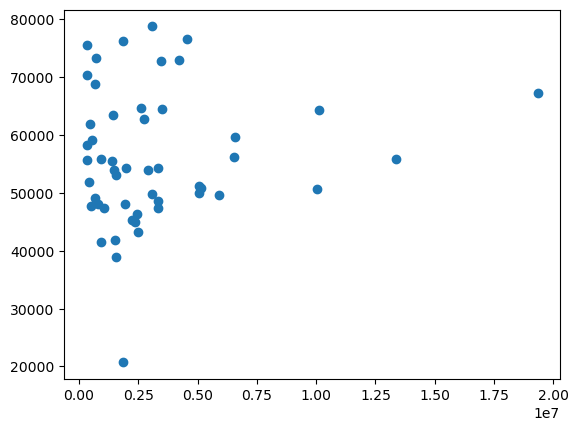

In [38]:
#scatterplot
plt.scatter(x=df['Women'],y=df['Income'])

In [39]:
df.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')

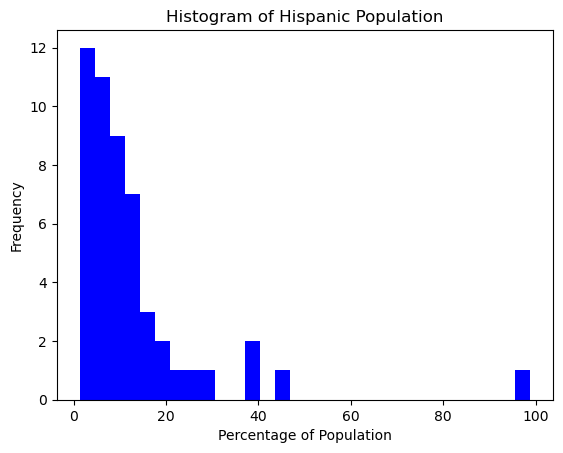

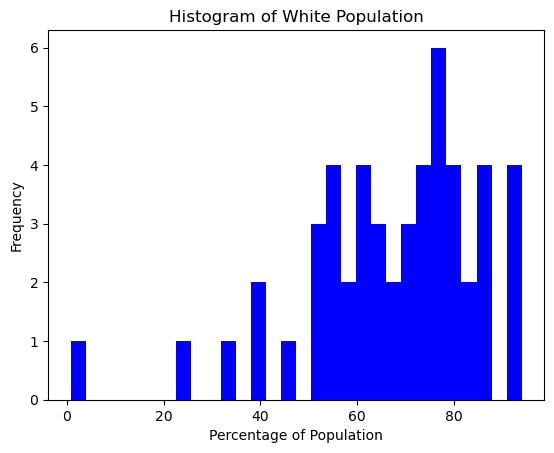

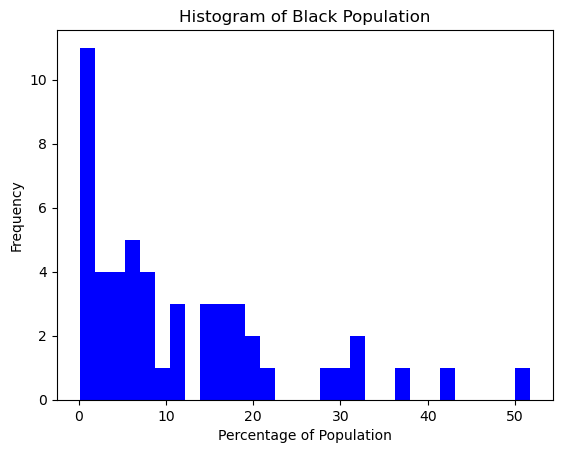

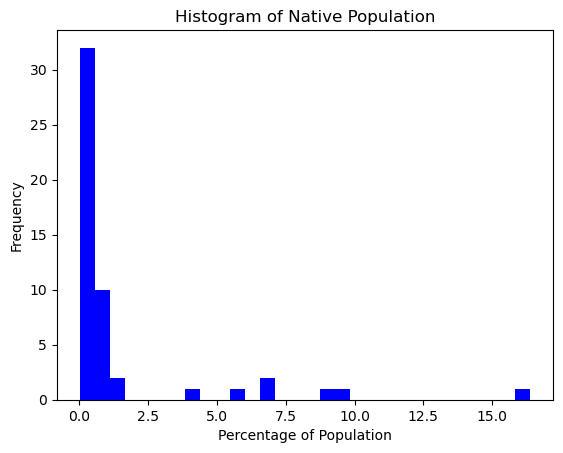

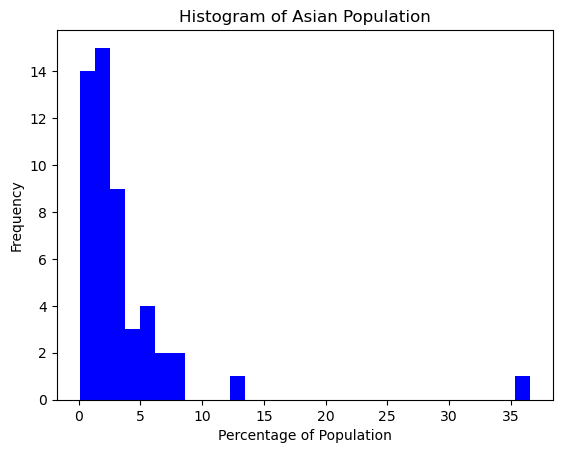

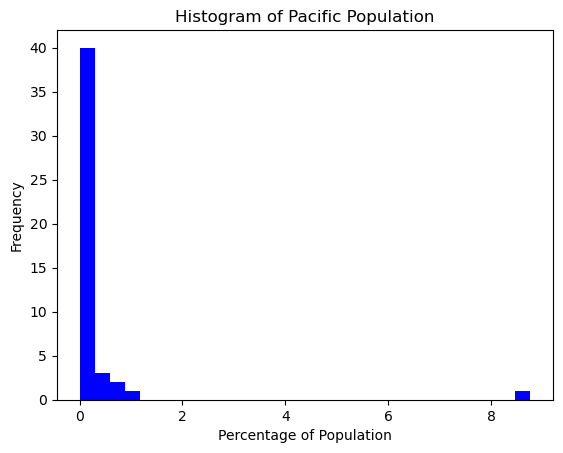

In [40]:
# Create histograms for each race category
race_categories = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for race in race_categories:
    plt.hist(df[race], color ='blue',bins=30)
    plt.title(f'Histogram of {race} Population')
    plt.xlabel('Percentage of Population')
    plt.ylabel('Frequency')
    plt.show()

In [41]:
'''''''''''''''''''''''''''''''''''''''''END'''''''''''''''''''''''''''''''''''

"''END"